In [89]:
import pandas as pd
dataset=pd.read_csv('D:/Document/ML_py_practice/apples_and_oranges.csv')
dataset.head(7)



,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange
5,73,5.68,apple
6,70,5.56,apple


In [90]:
dataset[dataset.Class=="apple"].head()

,Weight,Size,Class
3,72,5.85,apple
5,73,5.68,apple
6,70,5.56,apple
7,75,5.11,apple
8,74,5.36,apple


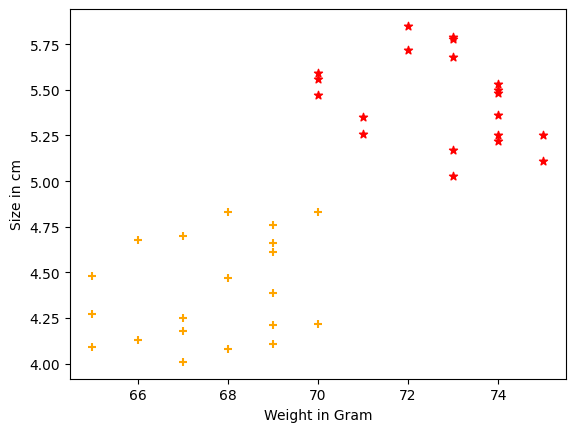

In [91]:
from matplotlib import pyplot as plt
df_orange=dataset[dataset.Class=="orange"]
df_apple=dataset[dataset.Class=="apple"]
plt.xlabel("Weight in Gram")
plt.ylabel("Size in cm")
plt.scatter(df_orange["Weight"],df_orange["Size"],color="orange",marker="+")
plt.scatter(df_apple["Weight"],df_apple["Size"],color="red",marker="*")

In [92]:
from sklearn.model_selection import train_test_split

training_set, test_set = train_test_split(dataset, test_size=0.3,random_state=1)

X_train = training_set.iloc[:, 0:2].values
Y_train = training_set.iloc[:, 2].values
X_test = test_set.iloc[:, 0:2].values
Y_test = test_set.iloc[:, 2].values
print(Y_train)

['apple' 'orange' 'apple' 'apple' 'orange' 'apple' 'apple' 'orange'
 'orange' 'orange' 'orange' 'orange' 'orange' 'apple' 'apple' 'orange'
 'apple' 'apple' 'orange' 'orange' 'orange' 'orange' 'apple' 'apple'
 'orange' 'apple' 'apple' 'apple']


In [93]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=1)
classifier.fit(X_train, Y_train)

SVC(random_state=1)

In [94]:
Y_pred=classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.9166666666666666


In [95]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le =LabelEncoder()
Y_train=le.fit_transform(Y_train)
print(Y_train)


[0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0]


In [96]:
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train, Y_train)
X_set_train, Y_set_train = X_train, Y_train
import numpy as np
X1, X2 = np.meshgrid(np.arange(start=X_set_train[:, 0].min(), 
stop=X_set_train[:, 0].max(), step=0.01), np.arange(start=X_set_train[:, 1].min(), stop=X_set_train[:, 1].max(), step=0.01))


C:\Users\varul\AppData\Local\Temp\ipykernel_38500\1245274172.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set_train[Y_set_train == j, 0], X_set_train[Y_set_train==j, 1], c=ListedColormap(('red', 'orange'))(i), label=j)


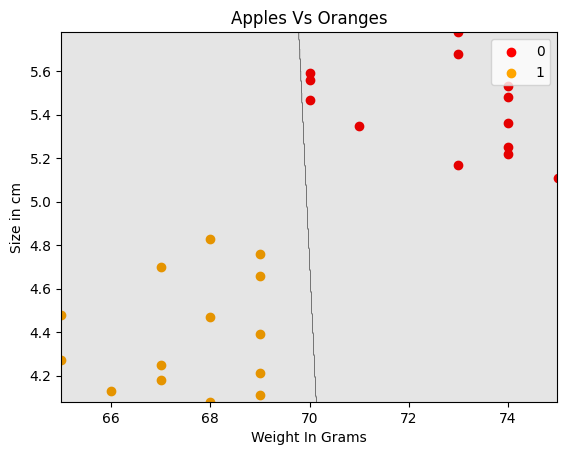

In [112]:
from matplotlib.colors import ListedColormap
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set_train)):
 plt.scatter(X_set_train[Y_set_train == j, 0], X_set_train[Y_set_train==j, 1], c=ListedColormap(('red', 'orange'))(i), label=j)
 plt.title('Apples Vs Oranges')
 plt.xlabel('Weight In Grams')
 plt.ylabel('Size in cm')
 plt.legend()

Z_train = np.array([X1.ravel(), X2.ravel()]).T
plt.contourf(X1, X2, classifier.predict(Z_train).reshape(X1.shape), alpha=0.1, cmap=ListedColormap('black', 'white'))
